# **1. Importar librerías**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from scipy.stats import chi2_contingency

# **2. Cargar datasets**

In [ ]:
df1 = pd.read_csv('HistConsultas.csv', sep=';', encoding='latin-1')
df1.head()

,ID_Cuenta,Fecha_consulta,Tipo_consulta
0,340,2015-06-22 16:14:35,Actualización datos
1,340,2015-06-22 16:37:02,Agendamiento citas
2,340,2015-06-22 15:50:56,Agendamiento citas
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas


In [ ]:
df1.tail()

,ID_Cuenta,Fecha_consulta,Tipo_consulta
641475,YA5972336,2015-06-23 18:09:45,Agendamiento citas
641476,YA5981643,2015-06-23 19:35:04,Actualización datos
641477,YB429084,2015-08-19 21:28:34,Agendamiento citas
641478,YO231519S,2015-06-30 13:05:21,Información general
641479,Z3047092,2015-09-25 14:42:42,Agendamiento citas


In [ ]:
df2 = pd.read_csv('Usuarios.csv', sep=';', encoding='latin-1')
df2.head(5)

,ID_Cuenta,Tipo_persona,Departamento
0,340,soltero,Santafé de Bogotá
1,4d5c0e16-9bef-8334-687e-55f043e02c62,soltero,Santafé de Bogotá
2,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,soltero,Santafé de Bogotá
3,1640de7c-ba08-cdfc-c21b-517fd7c5a259,soltero,Santafé de Bogotá
4,e820f090-f4e7-eb8b-677c-55808c868b6f,unión libre,Santafé de Bogotá


In [ ]:
df2.tail()

,ID_Cuenta,Tipo_persona,Departamento
337046,YA5972336,soltero,Santafé de Bogotá
337047,YA5981643,soltero,Santafé de Bogotá
337048,YB429084,NaN,Santafé de Bogotá
337049,YO231519S,soltero,Exterior
337050,Z3047092,soltero,Santafé de Bogotá


# **3. Explorar datasets**

**Cantidad de registros**

In [ ]:
df1.shape

(641480, 3)

In [ ]:
df2.shape

(337051, 3)

**IDs únicos de cuenta**

In [ ]:
len(df1.ID_Cuenta.unique())

319862

In [ ]:
df1['ID_Cuenta'].value_counts()

1234          330
121314        278
79626334       74
14274459       72
51658310       65
             ... 
900855949       1
80411068        1
20084676        1
1070944858      1
79341479        1
Name: ID_Cuenta, Length: 319862, dtype: int64

In [ ]:
len(df2.ID_Cuenta.unique())

319862

In [ ]:
df2['ID_Cuenta'].value_counts()

121314        14
1234          13
1022390282     8
1              7
30881871       6
              ..
79365168       1
1030583820     1
52169677       1
900737767      1
79341479       1
Name: ID_Cuenta, Length: 319862, dtype: int64

In [ ]:
rows1 = df1[df1['ID_Cuenta'] == '340'] # Este dataset parece tener consistencia.
# ¿Es posible que un mismo usuario realice varias consultas simultáneamente? Es decir que, para una misma fecha/hora, se tengan dos tipos de consulta diferentes.
print(rows1)

  ID_Cuenta       Fecha_consulta        Tipo_consulta
0       340  2015-06-22 16:14:35  Actualización datos
1       340  2015-06-22 16:37:02   Agendamiento citas
2       340  2015-06-22 15:50:56   Agendamiento citas


In [ ]:
rows2 = df2[df2['ID_Cuenta'] == '340']
print(rows2)

  ID_Cuenta Tipo_persona       Departamento
0       340      soltero  Santafé de Bogotá


In [ ]:
rows12 = df1[df1['ID_Cuenta'] == '0013469804']
print(rows12)

       ID_Cuenta       Fecha_consulta        Tipo_consulta
2052  0013469804  2015-06-18 15:54:34  Peticiones y quejas
2053  0013469804  2015-06-18 16:00:29  Peticiones y quejas
2054  0013469804  2015-06-18 15:38:01  Peticiones y quejas


In [ ]:
rows22 = df2[df2['ID_Cuenta'] == '0013469804'] # Aquí se presenta una incongruencia: El mismo usuario con dos estados civil y departamentos origen diferentes.
# No sería una incongruencia si, estando dentro del mismo dataset, ambos registros correspondieran a fechas/horas de consulta diferentes.
print(rows22)

      ID_Cuenta Tipo_persona       Departamento
678  0013469804          NaN           Exterior
679  0013469804      soltero  Santafé de Bogotá


**Búsqueda de nulos**

In [ ]:
df1.isnull().values.any() # El dataset 1 no tiene nulos

False

In [ ]:
df2.isnull().values.any() # El dataset 2 tiene nulos

True

In [ ]:
df1.isna().sum()

ID_Cuenta         0
Fecha_consulta    0
Tipo_consulta     0
dtype: int64

In [ ]:
df2.isna().sum() # El dataset 2 tiene 6733 nulos
# df2.isnull().sum()

ID_Cuenta          0
Tipo_persona    6733
Departamento       0
dtype: int64

In [ ]:
df2 = df2.dropna() # Se eliminan todos los registros que contengan alguna entrada nula.
# ID_Cuenta no se puede imputar ni con la información disponible en el mismo registro (ya que no existe una relación clara entre las variables Tipo_persona o Departamento), ni con la información restante del dataset (porque se pueden tener diferentes usuarios con el mismo estado civil y/o departamento origen asociados).
# Imputar los datos faltantes con Tipo_persona o Departamento de otro registro para un mismo ID_Cuenta, produciría información redundante (registros duplicados o incongruentes) que después será eliminada del dataset.

**Búsqueda de registros duplicados**

In [ ]:
df1.duplicated().sum() # El dataset 1 no tiene registros duplicados
#print(df1[df1.duplicated()])

0

In [ ]:
df2.duplicated().sum() # El dataset 2 tiene 23 registros duplicados
#print(df2[df2.duplicated()])

23

In [ ]:
df2 = df2.drop_duplicates() # Se eliminan los registros duplicados

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330295 entries, 0 to 337050
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID_Cuenta     330295 non-null  object
 1   Tipo_persona  330295 non-null  object
 2   Departamento  330295 non-null  object
dtypes: object(3)
memory usage: 10.1+ MB


**Búsqueda de registros dobles inconsistentes**

In [ ]:
df11 = df1[df1.duplicated('ID_Cuenta', keep=False)].sort_values('ID_Cuenta')
df11.head(20)

,ID_Cuenta,Fecha_consulta,Tipo_consulta
118,0000000000-,2015-06-05 21:15:54,Actualización datos
117,0000000000-,2015-06-02 15:12:44,Actualización datos
116,0000000000-,2015-08-24 13:28:45,Información general
2052,0013469804,2015-06-18 15:54:34,Peticiones y quejas
2053,0013469804,2015-06-18 16:00:29,Peticiones y quejas
2054,0013469804,2015-06-18 15:38:01,Peticiones y quejas
2057,0026673,2015-08-20 16:14:30,Agendamiento citas
2055,0026673,2015-08-20 16:24:54,Procesos web
2056,0026673,2015-08-20 14:21:45,Procesos web
2064,01004355,2015-07-13 16:38:48,Actualización datos


In [ ]:
df11 = df1[df1.duplicated(subset=['ID_Cuenta', 'Fecha_consulta'], keep=False)].sort_values('ID_Cuenta')
df11.head(20) # No existen, en el datset 1, dos registros con el mismo ID de cuenta y la misma fecha de consulta.

,ID_Cuenta,Fecha_consulta,Tipo_consulta


In [ ]:
df11.shape

(0, 3)

In [ ]:
df11 = df1.drop_duplicates(subset=['ID_Cuenta', 'Fecha_consulta'], keep='first')
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641480 entries, 0 to 641479
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_Cuenta       641480 non-null  object
 1   Fecha_consulta  641480 non-null  object
 2   Tipo_consulta   641480 non-null  object
dtypes: object(3)
memory usage: 19.6+ MB


In [ ]:
df22 = df2[df2.duplicated('ID_Cuenta', keep=False)].sort_values('ID_Cuenta')
print(df22) # Se observan "inconsistencias" en el dataset 2: Dos ID de cuenta idénticos con el mismo tipo de persona, pero diferentes departamentos.

          ID_Cuenta Tipo_persona       Departamento
56      0000000000-      soltero  Santafé de Bogotá
55      0000000000-      soltero          Santander
680         0026673      soltero           Exterior
681         0026673      soltero  Santafé de Bogotá
749       05CR72949      soltero           Exterior
...             ...          ...                ...
337005     N6029769      soltero          Antioquia
34              RUT      soltero           Casanare
33              RUT      soltero  Santafé de Bogotá
43                i      soltero  Santafé de Bogotá
44                i      soltero    Valle del Cauca

[32628 rows x 3 columns]


In [ ]:
df22 = df2[df2.duplicated(subset=['ID_Cuenta', 'Tipo_persona'], keep=False)].sort_values('ID_Cuenta')
print(df22)

           ID_Cuenta Tipo_persona       Departamento
55       0000000000-      soltero          Santander
56       0000000000-      soltero  Santafé de Bogotá
680          0026673      soltero           Exterior
681          0026673      soltero  Santafé de Bogotá
749        05CR72949      soltero           Exterior
...              ...          ...                ...
336974  HBO100507I78      soltero  Santafé de Bogotá
34               RUT      soltero           Casanare
33               RUT      soltero  Santafé de Bogotá
43                 i      soltero  Santafé de Bogotá
44                 i      soltero    Valle del Cauca

[27771 rows x 3 columns]


In [ ]:
df2 = df2.drop_duplicates(subset=['ID_Cuenta', 'Tipo_persona'], keep='first')
df2.info() # De dos o más registros que presenten esta inconsistencia,en el dataset2, se deja sólo el primero.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316294 entries, 0 to 337050
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID_Cuenta     316294 non-null  object
 1   Tipo_persona  316294 non-null  object
 2   Departamento  316294 non-null  object
dtypes: object(3)
memory usage: 9.7+ MB


In [ ]:
df22 = df2[df2.duplicated('ID_Cuenta', keep=False)].sort_values('ID_Cuenta')
print(df22)

           ID_Cuenta     Tipo_persona       Departamento
778         07525076      unión libre  Santafé de Bogotá
779         07525076         /casado.           Exterior
7                  1           casado           Exterior
11                 1  soltero-casado.          Antioquia
961         10005709  soltero-casado.  SANTAFÉ DE BOGOTÁ
...              ...              ...                ...
120          ANONIMO         /casado.  SANTAFÉ DE BOGOTÁ
136     ANONIMO 1314          soltero    Valle del Cauca
135     ANONIMO 1314         /casado.  Santafé de Bogotá
337005      N6029769          soltero          Antioquia
337006      N6029769          no sabe  Santafé de Bogotá

[4906 rows x 3 columns]


In [ ]:
df22 = df2[df2.duplicated(subset=['ID_Cuenta', 'Tipo_persona'], keep=False)].sort_values('ID_Cuenta')
print(df22)

Empty DataFrame
Columns: [ID_Cuenta, Tipo_persona, Departamento]
Index: []


**Cuántos IDs que están en el dataset 1 están también en el dataset 2, y viceversa.**

In [ ]:
df1['ID_Cuenta'].map(df2["ID_Cuenta"].value_counts()).fillna(0).astype(int).value_counts()

1     561694
2      65652
0      11503
3       1833
13       330
14       278
4         95
8         27
6         27
7         24
5         17
Name: ID_Cuenta, dtype: int64

In [ ]:
df1['ID_Cuenta'].map(df2["ID_Cuenta"].value_counts()).isnull().sum()  # Hay 11.503 IDs de cuenta del dataset 1 que no están en el dataset 2.

11503

In [ ]:
df2['ID_Cuenta'].map(df1["ID_Cuenta"].value_counts()).fillna(0).astype(int).value_counts()

1     176431
2      76294
3      33967
4      17167
5       9313
       ...  
74         1
62         1
65         1
72         1
49         1
Name: ID_Cuenta, Length: 61, dtype: int64

In [ ]:
df2['ID_Cuenta'].map(df1["ID_Cuenta"].value_counts()).isnull().sum()  # Todos los IDs de cuenta que tiene el dataset 2 están en el dataset 1.

0

# **4. Integrar los datasets**

In [ ]:
df = pd.merge(df1, df2, on='ID_Cuenta') # how='inner' por defecto: Sólo las filas que contienen valores de ID_Cuenta que son comunes entre df1 y df2 permanecen al combinar los datos.
#df = pd.merge(df1, df2, on='ID_Cuenta', how='left')

In [ ]:
df.head()

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento
0,340,2015-06-22 16:14:35,Actualización datos,soltero,Santafé de Bogotá
1,340,2015-06-22 16:37:02,Agendamiento citas,soltero,Santafé de Bogotá
2,340,2015-06-22 15:50:56,Agendamiento citas,soltero,Santafé de Bogotá
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09 14:35:37,Agendamiento citas,soltero,Santafé de Bogotá
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24 20:36:26,Agendamiento citas,soltero,Santafé de Bogotá


In [ ]:
df.shape

(641336, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641336 entries, 0 to 641335
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID_Cuenta       641336 non-null  object
 1   Fecha_consulta  641336 non-null  object
 2   Tipo_consulta   641336 non-null  object
 3   Tipo_persona    641336 non-null  object
 4   Departamento    641336 non-null  object
dtypes: object(5)
memory usage: 29.4+ MB


In [ ]:
df.isnull().values.any()
#df.isna().sum()

False

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df[df['ID_Cuenta'] == '340'])

  ID_Cuenta       Fecha_consulta  ... Tipo_persona       Departamento
0       340  2015-06-22 16:14:35  ...      soltero  Santafé de Bogotá
1       340  2015-06-22 16:37:02  ...      soltero  Santafé de Bogotá
2       340  2015-06-22 15:50:56  ...      soltero  Santafé de Bogotá

[3 rows x 5 columns]


In [ ]:
print(df[df['ID_Cuenta'] == '0013469804'])

       ID_Cuenta       Fecha_consulta  ... Tipo_persona       Departamento
3321  0013469804  2015-06-18 15:54:34  ...      soltero  Santafé de Bogotá
3322  0013469804  2015-06-18 16:00:29  ...      soltero  Santafé de Bogotá
3323  0013469804  2015-06-18 15:38:01  ...      soltero  Santafé de Bogotá

[3 rows x 5 columns]


In [ ]:
df['Fecha_consulta'] = pd.to_datetime(df['Fecha_consulta'])

df3 = df.sort_values(['ID_Cuenta', 'Fecha_consulta'], ascending=[True, True])

df3.head(20)

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento
84,.,2015-06-23 16:17:08,Procesos web,soltero,Santafé de Bogotá
641254,. IDENTIFICACI,2015-09-07 18:58:29,Peticiones y quejas,soltero,Santafé de Bogotá
188908,.29326354,2015-08-26 23:06:00,Procesos web,soltero,Exterior
507623,.8311543,2015-09-29 13:01:19,Agendamiento citas,/casado.,Antioquia
113,00000,2015-09-05 18:21:09,Información general,soltero,Santafé de Bogotá
23,000000,2015-09-15 19:18:17,Peticiones y quejas,unión libre,Santafé de Bogotá
157,000000000,2015-06-03 18:39:21,Información general,/casado.,Santafé de Bogotá
141,0000000000-,2015-06-02 15:12:44,Actualización datos,soltero,Santander
142,0000000000-,2015-06-05 21:15:54,Actualización datos,soltero,Santander
140,0000000000-,2015-08-24 13:28:45,Información general,soltero,Santander


In [ ]:
df3.tail(20)

,ID_Cuenta,Fecha_consulta,Tipo_consulta,Tipo_persona,Departamento
2223,b80a064e-3403-0384-c5f2-55c37ae763a8,2015-08-06 15:44:44,Procesos web,soltero,Santafé de Bogotá
156,b9fbc43f-2d92-81c7-d550-55b8258faa93,2015-07-29 01:01:48,Información general,soltero,Santafé de Bogotá
2131,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-12 17:50:32,Peticiones y quejas,soltero,Santafé de Bogotá
2129,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-12 20:36:14,Actualización datos,soltero,Santafé de Bogotá
2125,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-13 15:29:40,Procesos web,soltero,Santafé de Bogotá
2127,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-13 20:07:17,Procesos web,soltero,Santafé de Bogotá
2133,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-18 14:38:02,Peticiones y quejas,soltero,Santafé de Bogotá
2124,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-25 18:53:40,Procesos web,soltero,Santafé de Bogotá
2126,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-26 21:55:19,Agendamiento citas,soltero,Santafé de Bogotá
2132,d0c2cbe8-4f6f-a353-0186-55c38e4a0030,2015-08-27 14:21:11,Actualización datos,soltero,Santafé de Bogotá


In [ ]:
dg = df.groupby(['Tipo_persona'])['ID_Cuenta'].count() 
dg

Tipo_persona
/casado.            21526
carlos                 96
casado               7173
no dijo              6930
no sabe             22060
soltero            448005
soltero-casado.      7148
unión libre        128398
Name: ID_Cuenta, dtype: int64

In [ ]:
df.drop(df[df['Tipo_persona'] == 'carlos'].index, inplace = True)

In [ ]:
df['Tipo_persona']=df['Tipo_persona'].replace({'/casado.':'casado'})

In [ ]:
dg = df.groupby(['Tipo_persona'])['ID_Cuenta'].count() 
dg

Tipo_persona
casado              28699
no dijo              6930
no sabe             22060
soltero            448005
soltero-casado.      7148
unión libre        128398
Name: ID_Cuenta, dtype: int64

In [ ]:
dh = df.groupby(['Tipo_consulta'])['ID_Cuenta'].count() 
dh

Tipo_consulta
Actualización datos    110487
Agendamiento citas     166874
Información general     17985
Peticiones y quejas    100713
Procesos web           245181
Name: ID_Cuenta, dtype: int64

a) ¿Existe alguna relación entre el tipo de persona y el tipo de consulta realizada?

In [ ]:
df3 = df[[i for i in df.columns if i not in ('ID_Cuenta', 'Fecha_consulta')]]

df3.head()

,Tipo_consulta,Tipo_persona,Departamento
0,Actualización datos,soltero,Santafé de Bogotá
1,Agendamiento citas,soltero,Santafé de Bogotá
2,Agendamiento citas,soltero,Santafé de Bogotá
3,Agendamiento citas,soltero,Santafé de Bogotá
4,Agendamiento citas,soltero,Santafé de Bogotá


In [ ]:
label = preprocessing.LabelEncoder()
df3_encoded = pd.DataFrame() 

for i in df3.columns :
  df3_encoded[i]=label.fit_transform(df3[i])

In [ ]:
df3_encoded.head()

,Tipo_consulta,Tipo_persona,Departamento
0,0,3,56
1,1,3,56
2,1,3,56
3,1,3,56
4,1,3,56


In [ ]:
def cramers_V(var1,var2):
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in df3_encoded:
  col = []
  for var2 in df3_encoded :
    cramers = cramers_V(df3_encoded[var1], df3_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df4 = pd.DataFrame(cramers_results, columns = df3_encoded.columns, index = df3_encoded.columns)

df4

,Tipo_consulta,Tipo_persona,Departamento
Tipo_consulta,1.00,0.01,0.01
Tipo_persona,0.01,1.00,0.00
Departamento,0.01,0.00,1.00


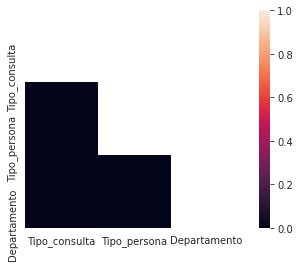

In [ ]:
mask = np.zeros_like(df4, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df4, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [ ]:
corrMatrix = df3_encoded.corr()

print(corrMatrix)

               Tipo_consulta  Tipo_persona  Departamento
Tipo_consulta       1.000000      0.041380     -0.075506
Tipo_persona        0.041380      1.000000      0.030239
Departamento       -0.075506      0.030239      1.000000


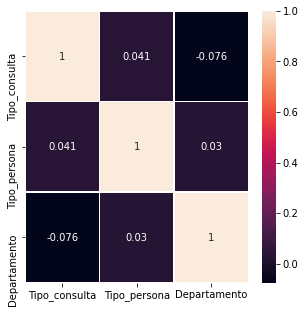

In [ ]:
plt.figure(figsize = (5,5))

corrMatrix = df3_encoded.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5)

¿Cuál es el perfil del tipo de consulta de cada departamento? ¿Existen grupos de departamentos con necesidades similares de información?

In [ ]:
#Se imprimen los valores únicos de la columna 'Departamento', en orden alfabético, con el fin de observar si hay valores duplicados
my_arr = np.sort(df['Departamento'].unique())

for val in my_arr:
    print(val)

AMAZONAS
ANTIOQUIA
ARAUCA
ATLÁNTICO
Amazonas
Antioquia
Arauca
Atlántico
BOLÍVAR
BOYACÁ
Bolívar
Boyacá
CALDAS
CAQUETÁ
CASANARE
CAUCA
CESAR
CHOCÓ
CUNDINAMARCA
Caldas
Caquetá
Casanare
Cauca
Cesar
Chocó
Cundinamarca
CÓRDOBA
Córdoba
EXTERIOR
Exterior
GUAVIARE
Guainía
Guaviare
HUILA
Huila
LA GUAJIRA
La Guajira
MAGDALENA
META
Magdalena
Meta
NARIÑO
NORTE DE SANTANDER
Nariño
Norte de Santander
PUTUMAYO
Putumayo
QUINDÍO
Quindío
RISARALDA
Risaralda
SAN ANDRÉS Y PROVIDENCIA
SANTAFÉ DE BOGOTÁ
SANTANDER
SUCRE
San Andrés y Providencia
Santafé de Bogotá
Santander
Sucre
TOLIMA
Tolima
VALLE DEL CAUCA
VAUPÉS
Valle del Cauca
Vaupés
Vichada


In [ ]:
#Se llevan a mayúscula todos los departamentos, y se determinan los valores únicos
df['Departamento'] = df['Departamento'].str.upper()
df.Departamento.unique()

array(['SANTAFÉ DE BOGOTÁ', 'EXTERIOR', 'ANTIOQUIA', 'CESAR', 'META',
       'ATLÁNTICO', 'CUNDINAMARCA', 'VALLE DEL CAUCA', 'RISARALDA',
       'SANTANDER', 'ARAUCA', 'QUINDÍO', 'BOLÍVAR', 'NARIÑO', 'HUILA',
       'CALDAS', 'CASANARE', 'CAUCA', 'TOLIMA', 'PUTUMAYO',
       'NORTE DE SANTANDER', 'MAGDALENA', 'AMAZONAS', 'LA GUAJIRA',
       'SUCRE', 'BOYACÁ', 'CHOCÓ', 'CÓRDOBA', 'CAQUETÁ', 'GUAINÍA',
       'GUAVIARE', 'VAUPÉS', 'VICHADA', 'SAN ANDRÉS Y PROVIDENCIA'],
      dtype=object)

In [ ]:
#Se imprimen los valores únicos de la columna 'Departamento', en orden alfabético, con el fin de observar si hay valores duplicados
my_arr = np.sort(df['Departamento'].unique())

for val in my_arr:
    print(val)

AMAZONAS
ANTIOQUIA
ARAUCA
ATLÁNTICO
BOLÍVAR
BOYACÁ
CALDAS
CAQUETÁ
CASANARE
CAUCA
CESAR
CHOCÓ
CUNDINAMARCA
CÓRDOBA
EXTERIOR
GUAINÍA
GUAVIARE
HUILA
LA GUAJIRA
MAGDALENA
META
NARIÑO
NORTE DE SANTANDER
PUTUMAYO
QUINDÍO
RISARALDA
SAN ANDRÉS Y PROVIDENCIA
SANTAFÉ DE BOGOTÁ
SANTANDER
SUCRE
TOLIMA
VALLE DEL CAUCA
VAUPÉS
VICHADA


In [ ]:
df_grouped = df.groupby(['Departamento', 'Tipo_consulta'], as_index=False).size()

In [ ]:
df_grouped.rename(columns={'size':'Cantidad_consultas'}, inplace=True)

In [ ]:
df_grouped

,Departamento,Tipo_consulta,Cantidad_consultas
0,AMAZONAS,Actualización datos,4
1,AMAZONAS,Agendamiento citas,8
2,AMAZONAS,Información general,2
3,AMAZONAS,Peticiones y quejas,11
4,AMAZONAS,Procesos web,25
...,...,...,...
162,VAUPÉS,Procesos web,12
163,VICHADA,Actualización datos,10
164,VICHADA,Agendamiento citas,1
165,VICHADA,Peticiones y quejas,8


In [ ]:
df_grouped.shape

(167, 3)

In [ ]:
df_grouped.index[(df_grouped['Departamento'] == 'SANTAFÉ DE BOGOTÁ')]

Int64Index([133, 134, 135, 136, 137], dtype='int64')

In [ ]:
df_grouped1 = df_grouped.copy()

df_grouped1.drop(df_grouped1.index[(df_grouped1['Departamento'] == 'SANTAFÉ DE BOGOTÁ')], axis=0, inplace=True)

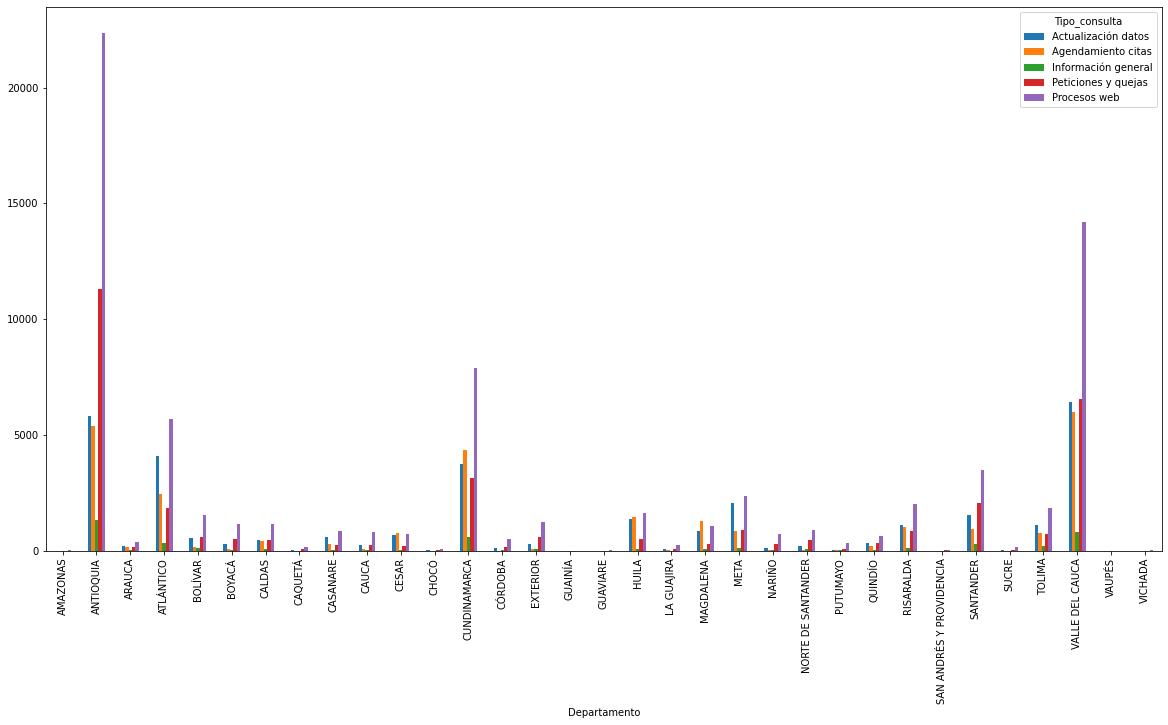

In [ ]:
df_grouped1.pivot(index='Departamento', columns='Tipo_consulta', values='Cantidad_consultas').plot(kind="bar", figsize = (20,10))

#plt.yticks(np.arange(0, 25000, 2500))

([], <a list of 0 Text major ticklabel objects>)

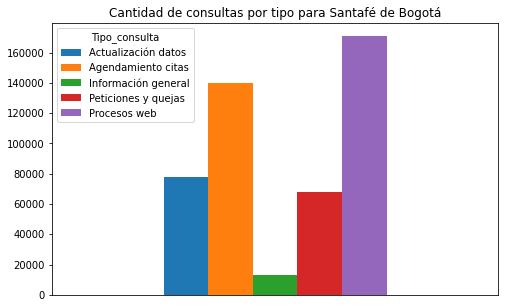

In [ ]:
index2 = [133, 134, 135, 136, 137]

df_grouped2 = df_grouped.iloc[df_grouped.index.isin(index2)]

df_grouped2.pivot(index='Departamento', columns='Tipo_consulta', values='Cantidad_consultas').plot(kind="bar", figsize = (8,5))

plt.title('Cantidad de consultas por tipo para Santafé de Bogotá')

plt.xlabel('')

plt.xticks([])

In [ ]:
#df_grouped.pivot(index='Departamento', columns='Tipo_consulta', values='Cantidad_consultas').plot(kind="bar", figsize = (20,10))

#scale_factor = 0.5

##xmin, xmax = plt.xlim()
#ymin, ymax = plt.ylim()

##plt.xlim(xmin * scale_factor, xmax * scale_factor)
#plt.ylim(ymin * scale_factor, ymax * scale_factor)

In [ ]:
df_grouped3 = df_grouped1.sort_values('Cantidad_consultas', ascending=False)

In [ ]:
df_grouped3.head()

,Departamento,Tipo_consulta,Cantidad_consultas
9,ANTIOQUIA,Procesos web,22360
157,VALLE DEL CAUCA,Procesos web,14209
8,ANTIOQUIA,Peticiones y quejas,11314
64,CUNDINAMARCA,Procesos web,7894
156,VALLE DEL CAUCA,Peticiones y quejas,6570


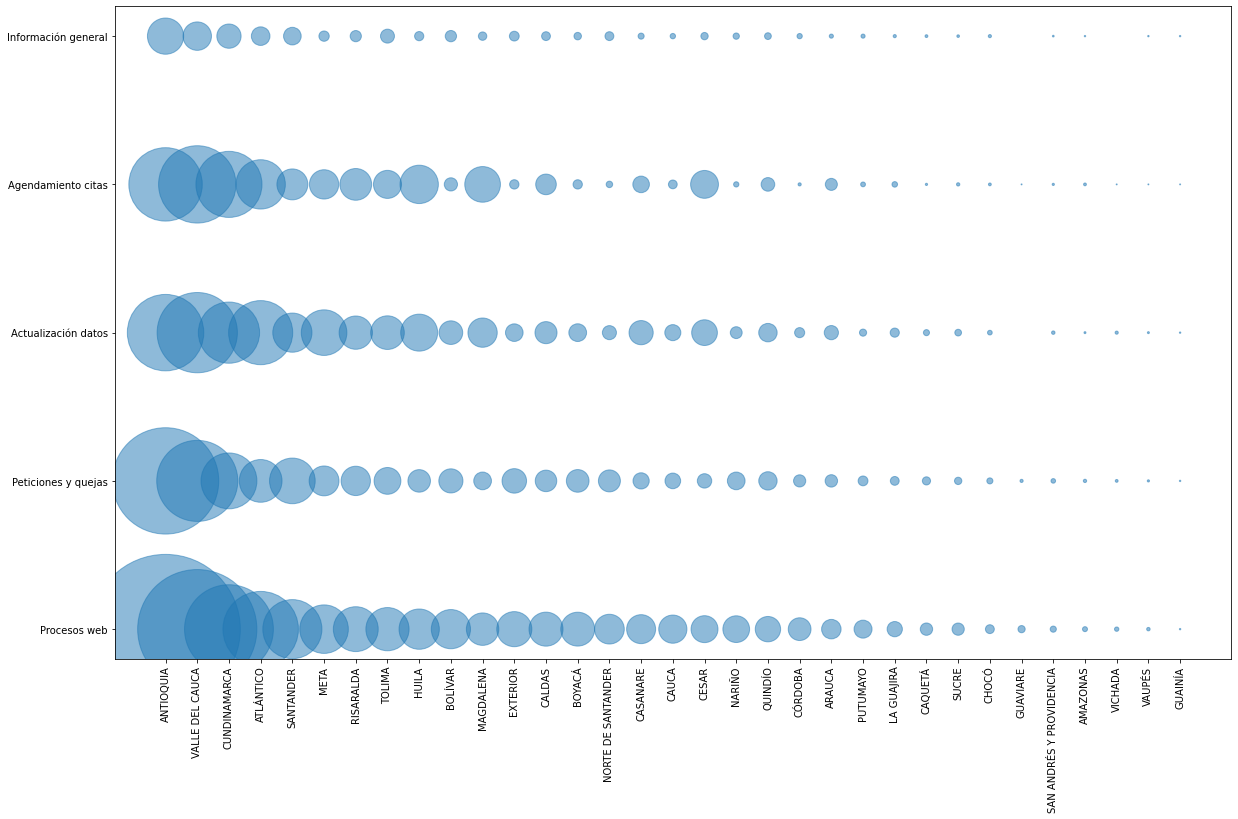

In [ ]:
#colors = np.random.rand(31)

x = df_grouped3['Departamento']
y = df_grouped3['Tipo_consulta']
s = df_grouped3['Cantidad_consultas']


plt.figure(figsize=(20,12))

plt.scatter(x, y, s, alpha=0.5)

plt.xticks(rotation='vertical')

plt.show()

In [ ]:
grouped = df_grouped.groupby('Tipo_consulta')

new_df = pd.DataFrame([], columns = df_grouped.columns)

for key, values in grouped:

    new_df = pd.concat([new_df, grouped.get_group(key).sort_values('Cantidad_consultas', ascending=False)[:11]], 0)

In [ ]:
new_df

,Departamento,Tipo_consulta,Cantidad_consultas
133,SANTAFÉ DE BOGOTÁ,Actualización datos,77825
153,VALLE DEL CAUCA,Actualización datos,6445
5,ANTIOQUIA,Actualización datos,5842
15,ATLÁNTICO,Actualización datos,4109
60,CUNDINAMARCA,Actualización datos,3751
98,META,Actualización datos,2081
138,SANTANDER,Actualización datos,1535
83,HUILA,Actualización datos,1369
148,TOLIMA,Actualización datos,1132
123,RISARALDA,Actualización datos,1110


Determinar la franja horaria de mayor flujo de consultas.

In [ ]:
#Se extrae la hora de la columna Fecha_consulta, y se inserta una nueva columna en la tercera posición a la izquierda

df4 = df.copy()

df4['Fecha_consulta'] = pd.to_datetime(df['Fecha_consulta']).dt.date

H = pd.to_datetime(df['Fecha_consulta']).dt.time
df4.insert(2, 'Hora_consulta', H)

In [ ]:
df4.head()

,ID_Cuenta,Fecha_consulta,Hora_consulta,Tipo_consulta,Tipo_persona,Departamento
0,340,2015-06-22,16:14:35,Actualización datos,soltero,SANTAFÉ DE BOGOTÁ
1,340,2015-06-22,16:37:02,Agendamiento citas,soltero,SANTAFÉ DE BOGOTÁ
2,340,2015-06-22,15:50:56,Agendamiento citas,soltero,SANTAFÉ DE BOGOTÁ
3,4d5c0e16-9bef-8334-687e-55f043e02c62,2015-09-09,14:35:37,Agendamiento citas,soltero,SANTAFÉ DE BOGOTÁ
4,66df1d0e-0d2c-1e44-aa3a-55b2a013640c,2015-07-24,20:36:26,Agendamiento citas,soltero,SANTAFÉ DE BOGOTÁ


In [ ]:
df4.tail()

,ID_Cuenta,Fecha_consulta,Hora_consulta,Tipo_consulta,Tipo_persona,Departamento
641331,XHTML1.0,2015-06-02,15:59:34,Peticiones y quejas,soltero,SANTAFÉ DE BOGOTÁ
641332,YA5972336,2015-06-23,18:09:45,Agendamiento citas,soltero,SANTAFÉ DE BOGOTÁ
641333,YA5981643,2015-06-23,19:35:04,Actualización datos,soltero,SANTAFÉ DE BOGOTÁ
641334,YO231519S,2015-06-30,13:05:21,Información general,soltero,EXTERIOR
641335,Z3047092,2015-09-25,14:42:42,Agendamiento citas,soltero,SANTAFÉ DE BOGOTÁ


In [ ]:
df4.shape

(641240, 6)

In [ ]:
df4.Tipo_consulta.unique().tolist()

['Actualización datos',
 'Agendamiento citas',
 'Peticiones y quejas',
 'Procesos web',
 'Información general']

In [ ]:
df5 = df4[['Tipo_consulta', 'Hora_consulta']]

m = pd.to_datetime('12:00:00').time()

list5 = df5.Tipo_consulta.unique().tolist()

for i in list5:
  df_grouped5 = df5[df5['Tipo_consulta'] == i].groupby(df5.Hora_consulta < m).size().rename({True: 'Mañana', False: 'Tarde'})
  print(i)
  print(df_grouped5)
  print('***************')

Actualización datos
Hora_consulta
Tarde     107719
Mañana      2768
dtype: int64
***************
Agendamiento citas
Hora_consulta
Tarde     162549
Mañana      4325
dtype: int64
***************
Peticiones y quejas
Hora_consulta
Tarde     98862
Mañana     1851
dtype: int64
***************
Procesos web
Hora_consulta
Tarde     238247
Mañana      6934
dtype: int64
***************
Información general
Hora_consulta
Tarde     17600
Mañana      385
dtype: int64
***************


In [ ]:
df5.groupby(df5.Hora_consulta < m).size().rename({True: 'Mañana', False: 'Tarde'})

Hora_consulta
Tarde     624977
Mañana     16263
dtype: int64

(array([1.0290e+04, 6.0500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.8000e+01, 5.3090e+03, 2.1232e+04, 5.0703e+04, 6.7603e+04,
        7.2682e+04, 7.4098e+04, 5.9056e+04, 4.5968e+04, 5.7580e+04,
        6.2574e+04, 5.7758e+04, 3.6739e+04, 1.8984e+04]),
 array([ 0.        ,  0.99930556,  1.99861111,  2.99791667,  3.99722222,
         4.99652778,  5.99583333,  6.99513889,  7.99444444,  8.99375   ,
         9.99305556, 10.99236111, 11.99166667, 12.99097222, 13.99027778,
        14.98958333, 15.98888889, 16.98819444, 17.9875    , 18.98680556,
        19.98611111, 20.98541667, 21.98472222, 22.98402778, 23.98333333]),
 <a list of 24 Patch objects>)

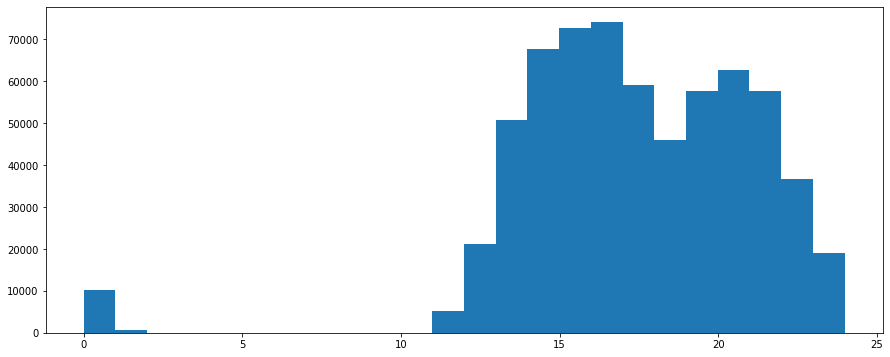

In [ ]:
plt.figure(figsize=(15,6))
plt.hist([t.hour + t.minute/60. for t in df4['Hora_consulta']], bins = 24)

[Text(0, 0, '0:00'),
 Text(0, 0, '1:00'),
 Text(0, 0, '2:00'),
 Text(0, 0, '3:00'),
 Text(0, 0, '4:00'),
 Text(0, 0, '5:00'),
 Text(0, 0, '6:00'),
 Text(0, 0, '7:00'),
 Text(0, 0, '8:00'),
 Text(0, 0, '9:00'),
 Text(0, 0, '10:00'),
 Text(0, 0, '11:00'),
 Text(0, 0, '12:00'),
 Text(0, 0, '13:00'),
 Text(0, 0, '14:00'),
 Text(0, 0, '15:00'),
 Text(0, 0, '16:00'),
 Text(0, 0, '17:00'),
 Text(0, 0, '18:00'),
 Text(0, 0, '19:00'),
 Text(0, 0, '20:00'),
 Text(0, 0, '21:00'),
 Text(0, 0, '22:00'),
 Text(0, 0, '23:00'),
 Text(0, 0, '0:00')]

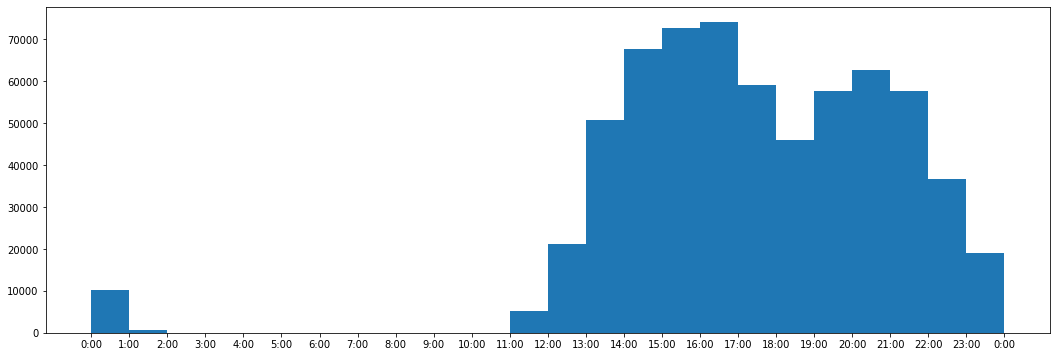

In [ ]:
import numpy as np

# get a list of the times
times = [t.hour + t.minute/60. for t in df4['Hora_consulta']]

# set the time interval required (in minutes)
tinterval = 60.

# find the lower and upper bin edges (on an integer number of 10 mins past the hour)
lowbin = np.min(times) - np.fmod(np.min(times)-np.floor(np.min(times)), tinterval/60.)
highbin = np.max(times) - np.fmod(np.max(times)-np.ceil(np.max(times)), tinterval/60.)
bins = np.arange(lowbin, highbin+1, tinterval/60.)  # set the bin edges

# create the histogram
plt.figure(figsize=(18,6))
plt.hist(times, bins=bins)
ax = plt.gca()  # get the current plot axes
ax.set_xticks(bins)  # set the position of the ticks to the histogram bin edges

# create new labels in hh:mm format (in twenty-four hour clock)
newlabels = []
for edge in bins:
    h, m = divmod(edge%24, 1)  # get hours and minutes (in 24 hour clock)
    newlabels.append('{0:01d}:{1:02d}'.format(int(h), int(m*60)))  # create the new label

ax.set_xticklabels(newlabels)  # set the new labels

In [ ]:
df6 = df4[['Tipo_consulta', 'Fecha_consulta']]

df4['Hora_consulta'] = pd.to_datetime(df4['Hora_consulta'], format='%H:%M:%S')

df6['Franja_horaria'] = df4['Hora_consulta'].dt.hour

df6.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Tipo_consulta,Fecha_consulta,Franja_horaria
0,Actualización datos,2015-06-22,16
1,Agendamiento citas,2015-06-22,16
2,Agendamiento citas,2015-06-22,15
3,Agendamiento citas,2015-09-09,14
4,Agendamiento citas,2015-07-24,20


In [ ]:
df6.shape

(641240, 3)

In [ ]:
df6.groupby(['Tipo_consulta', 'Franja_horaria'], as_index=False).size()

In [ ]:
df6.rename(columns={'size':'Cantidad_consultas'}, inplace=True)

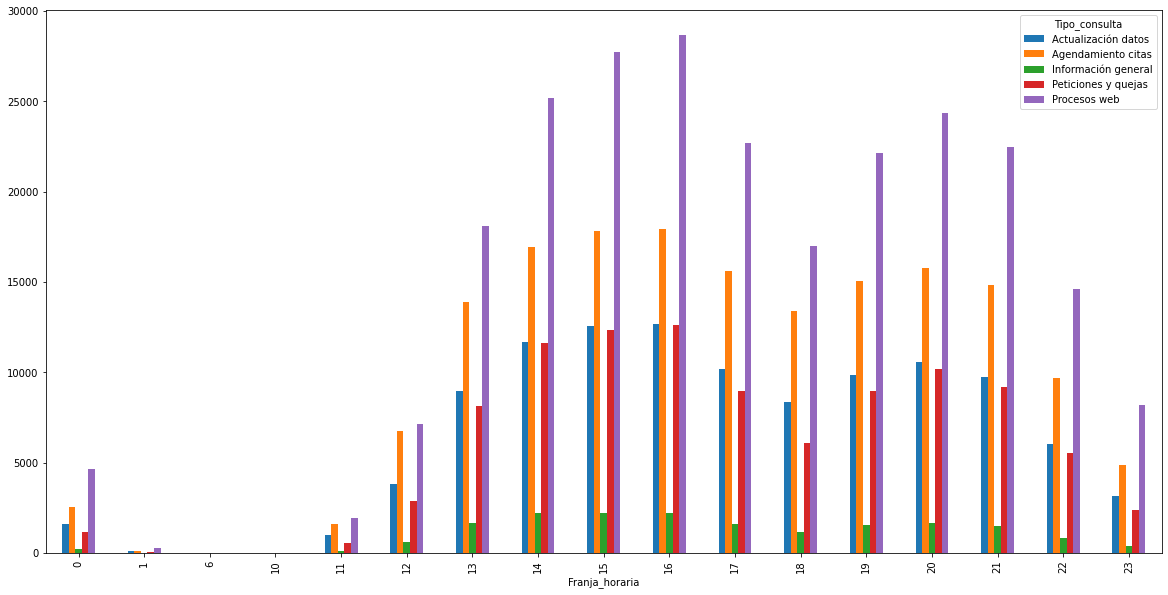

In [ ]:
df6.pivot(index='Franja_horaria', columns='Tipo_consulta', values='Cantidad_consultas').plot(kind="bar", figsize = (20,10))

Determinar la hora pico de consultas en cada departamento.

In [ ]:
df7 = df4[['Departamento', 'Fecha_consulta']]

df4['Hora_consulta'] = pd.to_datetime(df4['Hora_consulta'], format='%H:%M:%S')

df7['Franja_horaria'] = df4['Hora_consulta'].dt.hour

df7.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Departamento,Fecha_consulta,Franja_horaria
0,SANTAFÉ DE BOGOTÁ,2015-06-22,16
1,SANTAFÉ DE BOGOTÁ,2015-06-22,16
2,SANTAFÉ DE BOGOTÁ,2015-06-22,15
3,SANTAFÉ DE BOGOTÁ,2015-09-09,14
4,SANTAFÉ DE BOGOTÁ,2015-07-24,20


In [ ]:
df7.shape

(641240, 3)

In [ ]:
df8 = df7.groupby(['Departamento', 'Franja_horaria'], as_index=False).size()

df8.rename(columns={'size':'Cantidad_consultas'}, inplace=True)

list7 = df7.Departamento.unique().tolist()

list8 = []

for i in list7: 
  tuple8 = df8[df8['Departamento'] == i].max()
  list8.append(tuple8)

In [ ]:
df9 = pd.DataFrame(list8, columns=['Departamento', 'Franja_horaria', 'Cantidad_consultas']).sort_values('Cantidad_consultas', ascending=False)

In [ ]:
df9

,Departamento,Franja_horaria,Cantidad_consultas
0,SANTAFÉ DE BOGOTÁ,23,53979
2,ANTIOQUIA,23,5377
7,VALLE DEL CAUCA,23,4088
6,CUNDINAMARCA,23,2329
5,ATLÁNTICO,23,1716
9,SANTANDER,23,995
4,META,23,775
14,HUILA,23,598
8,RISARALDA,23,583
18,TOLIMA,23,571


¿Qué características tienen en común las personas que realizan las consultas en la misma franja horaria? ¿El tipo de persona o el departamento?
¿Cuál es el top 100 de usuarios que realizaron la mayor cantidad de consultas? 

Predecir el siguiente tipo de consulta que un usuario va a realizar. Predecir el departamento desde donde se va a disparar la siguiente consulta.